# Exploratory Data Analysis
This notebook serves as an exploratory data analysis (EDA) for the project and to better understand the data that we are dealing with 

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load the dataset
df = pd.read_csv('lastfm_artists_with_listeners.csv')

# display the first 5 rows of the data
print(df.head())

Matplotlib is building the font cache; this may take a moment.


        artist_name  listeners         tag
0  Paul Kalkbrenner   660758.0     minimal
1       Booka Shade   639947.0     minimal
2       Booka Shade   639947.0  tech house
3               AME   147752.0  deep house
4               AME   147752.0     minimal


In [3]:
print(df.info)

<bound method DataFrame.info of             artist_name  listeners         tag
0      Paul Kalkbrenner   660758.0     minimal
1           Booka Shade   639947.0     minimal
2           Booka Shade   639947.0  tech house
3                   AME   147752.0  deep house
4                   AME   147752.0     minimal
...                 ...        ...         ...
49409      kyril garcia      470.0      techno
49410    Time Warp 2010      682.0      techno
49411       Carmageddon      332.0      techno
49412            VRODAK      290.0      techno
49413         Trunkline      520.0      techno

[49414 rows x 3 columns]>


In [5]:
#finding out how many unique artists we have in the dataset

unique_artists_count = df['artist_name'].nunique()
print(f'Total number of rows: {len(df)}')
print(f"Total number of unique artists: {unique_artists_count}")


Total number of rows: 49414
Total number of unique artists: 40779


In [6]:
# check for missing values
missing_listeners = df[df['listeners'].isna()]
print(f"Total number of rows with missing listeners: {len(missing_listeners)}")

# check for missing values in the artist_name column
missing_artist_name = df[df['artist_name'].isna()]
print(f"Total number of rows with missing artist name: {len(missing_artist_name)}")


Total number of rows with missing listeners: 7
Total number of rows with missing artist name: 0


In [10]:
# drop the rows with the missing listeners
# the decision to drop the rows instead of filling is because there are not many missing values.
df_clean = df.dropna(subset=['listeners']).copy()
df_clean['listeners'] = df_clean['listeners'].astype(int)

print(f'Number of artists we can analyze: {len(df_clean)}')


Number of artists we can analyze: 49407


In [12]:
#summary statistics
#change format to show standard notation instead of scientific notation
pd.options.display.float_format = '{:.0f}'.format

print("Summary Statistics for Listener Counts (Standard Notation):")
display(df_clean['listeners'].describe())

Summary Statistics for Listener Counts (Standard Notation):


count     49407
mean      10121
std       52554
min           0
25%         172
50%        1092
75%        4586
max     4826591
Name: listeners, dtype: float64

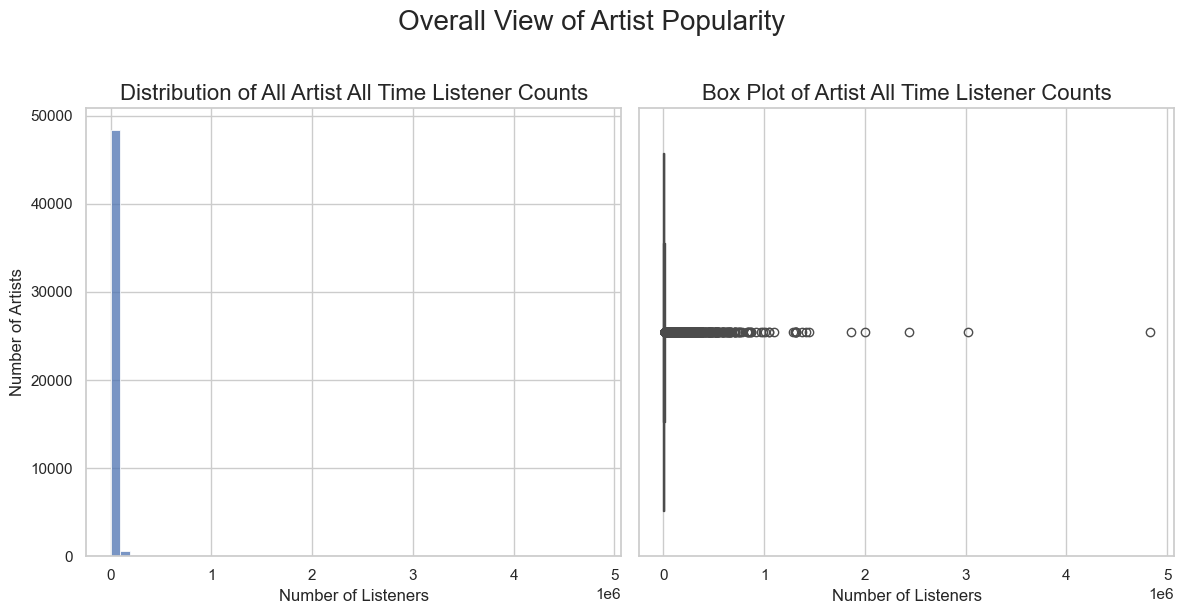

In [16]:
#visualize the distribution of listeners

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

#historgram of listeners
sns.histplot(ax=axes[0], data=df_clean, x='listeners', bins=50)
axes[0].set_title('Distribution of All Artist All Time Listener Counts', fontsize=16)
axes[0].set_xlabel('Number of Listeners')
axes[0].set_ylabel('Number of Artists')


#boxplot of listeners
sns.boxplot(ax=axes[1], data=df_clean, x='listeners')
axes[1].set_title('Box Plot of Artist All Time Listener Counts', fontsize=16)
axes[1].set_xlabel('Number of Listeners')

plt.suptitle('Overall View of Artist Popularity', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

This is great for our project. Now knowing that the majority of the artists have lower listener counts gives us a lot of playing room knowing that there are many "underground" artists out there.

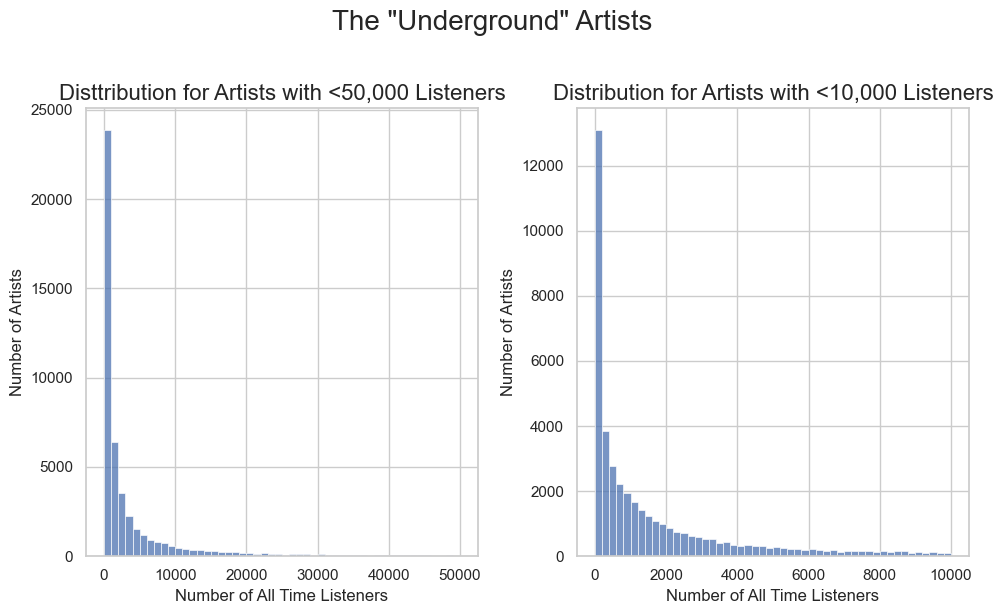

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# let's zoom into the artists with low listener counts
underground_test_df = df_clean[df_clean['listeners'] < 50000]
underground_test_2_df = df_clean[df_clean['listeners'] < 10000]

sns.histplot(ax=axes[0], data=underground_test_df, x='listeners', bins=50)
axes[0].set_title('Disttribution for Artists with <50,000 Listeners', fontsize=16)
axes[0].set_xlabel('Number of All Time Listeners')
axes[0].set_ylabel('Number of Artists')


#zoom in further
sns.histplot(ax=axes[1], data=underground_test_2_df, x='listeners', bins=50)
axes[1].set_title('Distribution for Artists with <10,000 Listeners', fontsize=16)
axes[1].set_xlabel('Number of All Time Listeners')
axes[1].set_ylabel('Number of Artists')


#together
plt.suptitle('The "Underground" Artists', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()


## Deciding where to make the cut-off for what makes an artist "Underground"

I will proceed the analysis with the following intuition: **Percentile-Based Cutoff**

- These long tails in the visualizations explain why we cannot simply use a cut-off value for what is considered "Undergorund"

- Definition 1: *An "underground" artists means that they are in the bottom x% of our dataset in terms of popularity*

- This approach has a clear statistical justificaiton and adapts to the specific distribution of our data

In [18]:
# calculating the listener counts at different percentile levels
p25 = df_clean['listeners'].quantile(0.25)
p50 = df_clean['listeners'].quantile(0.50) 
p75 = df_clean['listeners'].quantile(0.75)
p90 = df_clean['listeners'].quantile(0.90)

print("--- Data-Driven Threshold Options ---")
print(f"25th Percentile: {p25:,.0f} listeners. (25% of artists are below this line - 'Very Underground')")
print(f"50th Percentile (Median): {p50:,.0f} listeners. (50% of artists are below this line - 'Typical Artist')")
print(f"75th Percentile: {p75:,.0f} listeners. (75% of artists are below this line - 'More Established')")
print(f"90th Percentile: {p90:,.0f} listeners. (Only 10% of artists are more popular than this)")


--- Data-Driven Threshold Options ---
25th Percentile: 172 listeners. (25% of artists are below this line - 'Very Underground')
50th Percentile (Median): 1,092 listeners. (50% of artists are below this line - 'Typical Artist')
75th Percentile: 4,586 listeners. (75% of artists are below this line - 'More Established')
90th Percentile: 17,718 listeners. (Only 10% of artists are more popular than this)


# Analyzing by Genre (tag)

Let's see if we analyze by genre if that changes anything to the definition of "Underground"

--- Listener Statistics Broken Down by Genre Tag ---


,count,mean,std,min,25%,50%,75%,max
tag,,,,,,,,
deep house,10000,8163,35123,0,56,482,3302,1102352
house,9999,22620,97631,2,1971,4337,12642,4826591
minimal,9997,3618,21415,1,57,195,780,660758
tech house,9412,9517,41094,0,59,475,3484,1378246
techno,9999,6650,24903,1,724,1516,4348,1318715


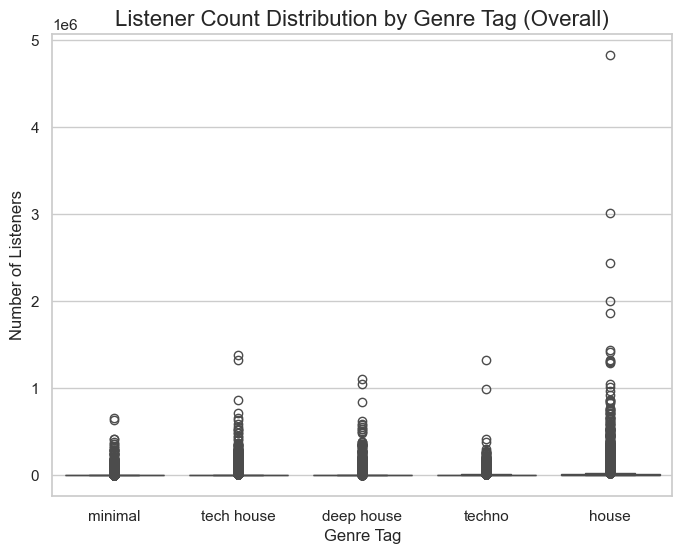

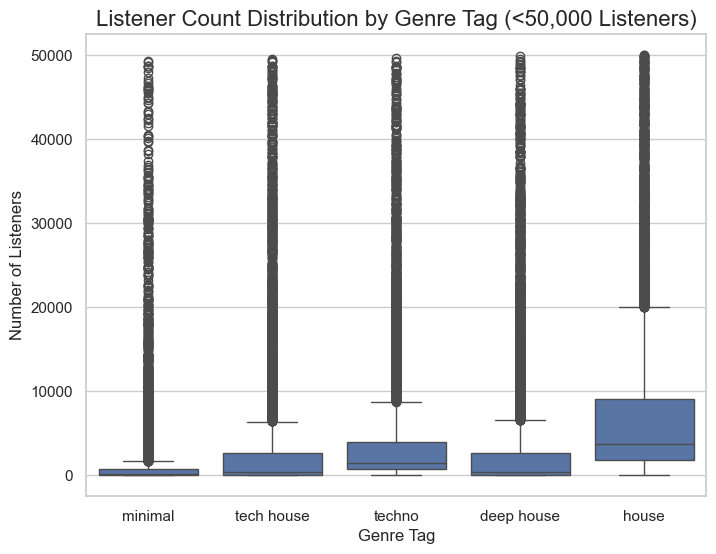

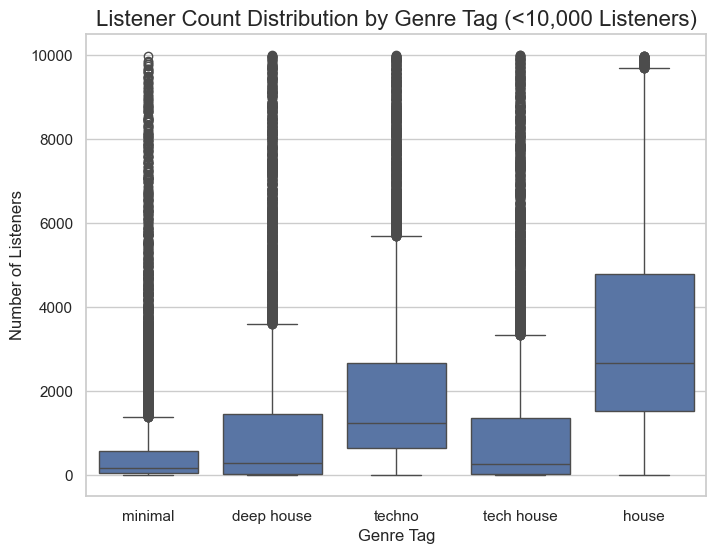

In [28]:
# group the df by the 'tag' column and then look at the stats for the 'listeners' in each of those groups.
listener_stats_by_tag = df_clean.groupby('tag')['listeners'].describe()

print("--- Listener Statistics Broken Down by Genre Tag ---")
display(listener_stats_by_tag)

# boxplot of listeners by tag
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_clean, x='tag', y='listeners')
plt.title('Listener Count Distribution by Genre Tag (Overall)', fontsize=16)
plt.xlabel('Genre Tag')
plt.ylabel('Number of Listeners')
plt.show()

# The plot above will be skewed by superstars. Let's create a "zoomed-in" version focusing on artists with fewer than 50,000 & 10,000 listeners.
plt.figure(figsize=(8, 6))
sns.boxplot(data=underground_test_df, x='tag', y='listeners')
plt.title('Listener Count Distribution by Genre Tag (<50,000 Listeners)', fontsize=16)
plt.xlabel('Genre Tag')
plt.ylabel('Number of Listeners')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=underground_test_2_df, x='tag', y='listeners')
plt.title('Listener Count Distribution by Genre Tag (<10,000 Listeners)', fontsize=16)
plt.xlabel('Genre Tag')
plt.ylabel('Number of Listeners')
plt.show()

## What do these new findings show?

1. **Popularity varies significantly by genre**: The definition of a "popular" artist is completely different depending on the genre
    - House is mainstream: the mean and max for house artists are dramatically higher than any other genre. House music has the broadest appeal and the biggest superstars. Also, house music is a very *basic* tab and it's definition is very ambiguous. 
    - Minimal is the most "Underground": The minimal tag has the lowest median listener count. This means that 50% of all artists tagged as minimal have fewer than 195 all-time listeners. It's a much more niche genre. 
    - Techno & House are neighbors: Techno, deep house, and tech house seem to occupy a middle ground, with techno being slightly more popular on average than deep house or tech house. 

2. **Every genre is skewed**: the boxplots and huge differencees between mean and median for every single tag/genre confirm that the power-law distribution exists across the board. Every genre has its handful of superstars and its massive long tail of unknown artists

## How does this change our definition of "Underground"?

Instead of using one single, global definition of "underground", we can now create a more *dynamic*, *genre-aware threshold*. 

- A `house` artist with 5,000 total listeners might be considered relatively small, while a `minimal` artist with 5,000 listeners could be one of the most popular artists in that entire genre. 

## Strategy Moving Forwards

1. **Understand the User's Genre**: When a user gives us an artists, we will first identify that artist's main genre (e.g. `tech house`)

2. **Use genre-specific stats**: We will then use the median listener count that we calculated for that specific genre. For `tech house` the median is about 500 listeners. 

3. **Set a Relative Threshold**: Our engine will define 'underground' based on that genre's median. For example, it might define an 'underground tech house artist' as any artist with a listener count below the 75th percentile for that genre. This threshold will be higher for popular genres like `house` or `minimal`. 

4. **Find the Hidden Gems**: The system will then search our database for artists that meet these dynamic, genre-specific criteria to find the perfect underground recommendations